In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

%matplotlib inline

In [143]:
ks_project = pd.read_csv("ks-projects-201801.csv")
ks_project


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [144]:
ks_project.drop("category",axis = 1, inplace = True)
ks_project.drop("ID",axis = 1, inplace= True)
ks_project.drop("name", axis = 1, inplace = True)
ks_project.drop("pledged", axis = 1, inplace = True)
ks_project.drop("usd_pledged_real", axis = 1, inplace = True)
ks_project.drop("usd pledged", axis = 1, inplace = True)
ks_project.drop("backers",axis=1,inplace = True)
ks_project.drop("goal",axis=1,inplace = True)

In [145]:
cleaned_state = {"failed":0,"canceled":np.nan,"successful":1,"undefined":np.nan,"live":np.nan,"suspended":np.nan}
ks_project["state"] = ks_project["state"].map(cleaned_state)
ks_project = ks_project.dropna(axis=0)
cleaned_country = {"N,0\"":np.nan}
ks_project["country"]=ks_project["country"].map(cleaned_country)

/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [146]:
print (ks_project[["main_category","state"]].groupby(["main_category"], as_index=False).mean())

   main_category     state
0            Art  0.448890
1         Comics  0.591415
2         Crafts  0.270530
3          Dance  0.654352
4         Design  0.415944
5        Fashion  0.282832
6   Film & Video  0.417906
7           Food  0.275914
8          Games  0.438905
9     Journalism  0.243914
10         Music  0.526606
11   Photography  0.341108
12    Publishing  0.347017
13    Technology  0.237856
14       Theater  0.637961


In [147]:
print (ks_project[["currency","state"]].groupby(["currency"], as_index=False).mean())

   currency     state
0       AUD  0.303731
1       CAD  0.334303
2       CHF  0.286810
3       DKK  0.389666
4       EUR  0.269996
5       GBP  0.409859
6       HKD  0.452830
7       JPY  0.304348
8       MXN  0.280652
9       NOK  0.279110
10      NZD  0.351648
11      SEK  0.337086
12      SGD  0.392070
13      USD  0.418258


In [148]:
currency_graph = ks_project[["currency","state"]].groupby(["currency"], as_index=False).mean()

In [149]:
print(currency_graph)

   currency     state
0       AUD  0.303731
1       CAD  0.334303
2       CHF  0.286810
3       DKK  0.389666
4       EUR  0.269996
5       GBP  0.409859
6       HKD  0.452830
7       JPY  0.304348
8       MXN  0.280652
9       NOK  0.279110
10      NZD  0.351648
11      SEK  0.337086
12      SGD  0.392070
13      USD  0.418258


In [150]:
currency_x = []
for i in currency_graph["currency"]:
    currency_x.append(str(i))
    
currency_y = []
for i in currency_graph["state"]:
    currency_y.append(float(i))

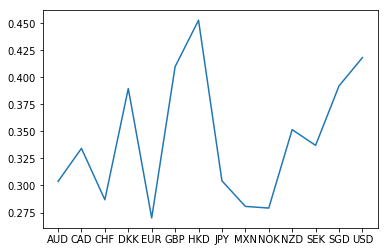

In [151]:
plt.plot(currency_x,currency_y)

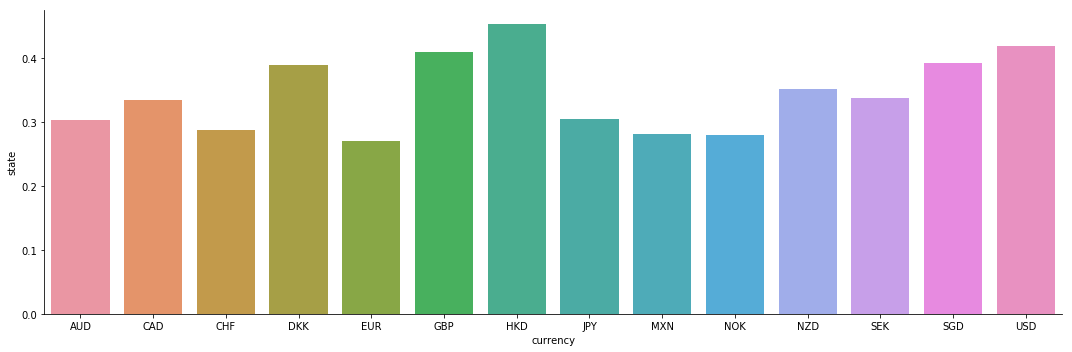

In [152]:
g = sns.factorplot(x = "currency",y = "state", data = currency_graph, kind = "bar", size = 5, aspect = 3)

In [153]:
country_graph = ks_project[["country","state"]].groupby(["country"], as_index=False).mean()

In [154]:
print(country_graph)

Empty DataFrame
Columns: [country, state]
Index: []


In [155]:
# g = sns.factorplot(x = "country",y = "state", data = country_graph, kind = "bar", size = 5, aspect = 3)

In [156]:

    
def goal_ranges_func(x):
    if x < 1500.0:
        return("very low")
    elif x < 3969.51:
        return("low")
    elif x < 8000.0:
        return("medium")
    elif x < 20000.0:
        return("high")
    else:
        return("very high")
    
ks_project["usd_goal_real"].apply(goal_ranges_func)


0               low
1         very high
2         very high
3            medium
5         very high
6          very low
7         very high
10              low
11             high
12           medium
13        very high
14           medium
15              low
16              low
17              low
18         very low
19           medium
20        very high
21              low
22              low
23         very low
24         very low
25             high
26             high
27             high
28         very low
29        very high
30           medium
31         very low
32         very low
            ...    
378625       medium
378627       medium
378628       medium
378629         high
378630          low
378631         high
378632         high
378633    very high
378634       medium
378635     very low
378636       medium
378637         high
378638       medium
378639       medium
378641    very high
378642     very low
378644          low
378645    very high
378646     very low


In [157]:
ks_project["goal_ranges"] = pd.qcut(ks_project["usd_goal_real"], 5)

# print(type(ks_project["goal_ranges"][0]))
# print (ks_project[["goal_ranges", "state"]].groupby(["goal_ranges"], as_index=False).mean())

/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


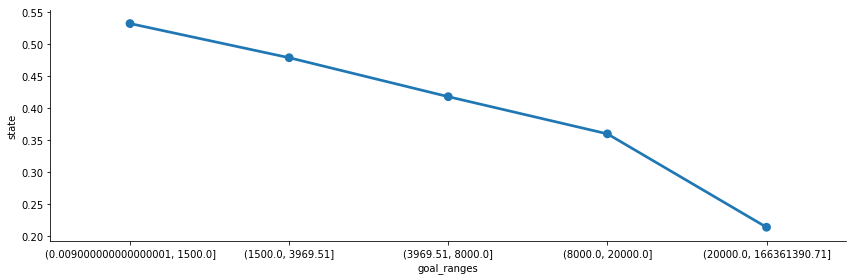

In [158]:
g = sns.factorplot(x = "goal_ranges", y = "state", data = ks_project, size = 4, aspect = 3)

In [159]:
# from datetime import timedelta


# datetimefmt = "%Y-%m-%d"
# datetimefmt2 = "%Y-%m-%d %H:%M:%S"
# dt1 = datetime.datetime.strptime(ks_project["deadline"][4],datetimefmt)
# dt2 = datetime.datetime.strptime(ks_project["launched"][4],datetimefmt2)

# print(dt1.date())
# print(dt2.date())
# num1 = dt1.date()-dt2.date()
# print(type(num1))
# print(num1.days)



In [160]:
new_index = []
for i in range(len(ks_project)):
    new_index.append(i)

In [161]:
ks_project["new_index"] = new_index
ks_project.set_index("new_index",inplace = True)

/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [162]:
from datetime import timedelta
import datetime


datetimefmt = "%Y-%m-%d"
datetimefmt2 = "%Y-%m-%d %H:%M:%S"
time_spent = []



for i in range(len(ks_project.index)):

    dt1 = datetime.datetime.strptime(ks_project["deadline"][i],datetimefmt)
    dt2 = datetime.datetime.strptime(ks_project["launched"][i],datetimefmt2)
    ans = dt1.date()- dt2.date()
    time_spent.append(ans.days)

ks_project["time_spent"] = time_spent
    

/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [163]:
# ks_project["time_spent"] = pd.qcut(ks_project["time_spent"],3)
# print(ks_project[["time_spent","state"]].groupby(["time_spent"],as_index=False).mean())


In [164]:
# g = sns.factorplot(x = a, y = "state", data = ks_project, size = 4, aspect = 3)

In [165]:
category_graph = ks_project[["main_category","state"]].groupby(["main_category"], as_index=False).mean()

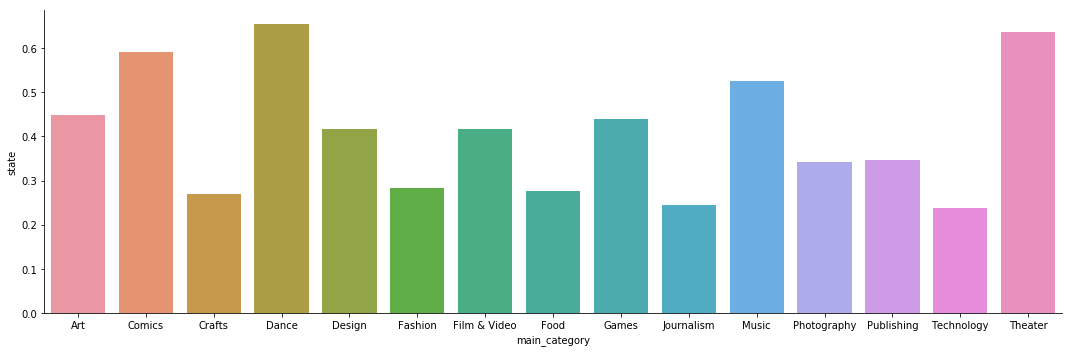

In [166]:
g = sns.factorplot(x = "main_category",y = "state", data = category_graph, kind = "bar", size = 5, aspect = 3)

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
#CHANGING goal_ranges TO LABELS OF INTEGERS
ks_project["goal_ranges"] = pd.qcut(ks_project["usd_goal_real"],5,labels=[1,2,3,4,5])

/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [169]:
#CHANGING time_spent TO LABELS OF INTEGERS
# def time_spent_func(x):
#     if x <30.0:
#         return("low")
#     elif x <31.0:
#         return("medium")
#     else:
#         return("high")
    
# ks_project["time_spent"].apply(time_spent_func)

ks_project["time_spent"] = pd.qcut(ks_project["time_spent"],3,labels=[1,2,3])



/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [ ]:
ks_project.to_csv("hello.csv",sep=",",encoding="utf-8")

In [51]:
cleaned_state = {0:"failed",1: "successful"}
# cleaned_time_spent = {(0.999, 30.0) : "low",(30.0,31.0) : "medium",(31.0, 92.0) : "high"}
# cleaned_goal_ranges = {(0.009000000000000001, 1500.0) : "very low",(1500.0, 3969.51):"low", (3969.51,8000.0):"medium", (8000.0, 20000.0):"high", (20000.0, 166361390.71):"very high"}

# ks_project["time_spent"].map(cleaned_time_spent)
# ks_project["goal_ranges"].map(cleaned_goal_ranges)

ks_project.head()

,main_category,currency,deadline,launched,state,country,usd_goal_real,goal_ranges,time_spent
new_index,,,,,,,,,
0,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0.0,GB,1533.95,2,3
1,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,0.0,US,30000.00,5,3
2,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,0.0,US,45000.00,5,3
3,Music,USD,2012-04-16,2012-03-17 03:24:11,0.0,US,5000.00,3,1
4,Food,USD,2016-04-01,2016-02-26 13:38:27,1.0,US,50000.00,5,3


In [52]:
#

more_currency = {"GBP": 1,"USD": 0,"CAD": 0,"AUD": 0,"NOK":0,"EUR":0,"MXN":0,"SEK":0,"NZD":0,"CHF":0,"DKK":0,"HKD":0,"SGD":0,"JPY":0}
ks_project["currency1"] = ks_project["currency"].map(more_currency)

more_currency = {"GBP": 0,"USD": 1,"CAD": 0,"AUD": 0,"NOK":0,"EUR":0,"MXN":0,"SEK":0,"NZD":0,"CHF":0,"DKK":0,"HKD":0,"SGD":0,"JPY":0}
ks_project["currency2"] = ks_project["currency"].map(more_currency)

more_currency = {"GBP": 0,"USD": 0,"CAD": 1,"AUD": 0,"NOK":0,"EUR":0,"MXN":0,"SEK":0,"NZD":0,"CHF":0,"DKK":0,"HKD":0,"SGD":0,"JPY":0}
ks_project["currency3"] = ks_project["currency"].map(more_currency)

more_currency = {"GBP": 0,"USD": 0,"CAD": 0,"AUD": 1,"NOK":0,"EUR":0,"MXN":0,"SEK":0,"NZD":0,"CHF":0,"DKK":0,"HKD":0,"SGD":0,"JPY":0}
ks_project["currency4"] = ks_project["currency"].map(more_currency)

more_currency = {"GBP": 0,"USD": 0,"CAD": 0,"AUD": 0,"NOK":1,"EUR":0,"MXN":0,"SEK":0,"NZD":0,"CHF":0,"DKK":0,"HKD":0,"SGD":0,"JPY":0}
ks_project["currency5"] = ks_project["currency"].map(more_currency)

more_currency = {"GBP": 0,"USD": 0,"CAD": 0,"AUD": 0,"NOK":0,"EUR":1,"MXN":0,"SEK":0,"NZD":0,"CHF":0,"DKK":0,"HKD":0,"SGD":0,"JPY":0}
ks_project["currency6"] = ks_project["currency"].map(more_currency)

more_currency = {"GBP": 0,"USD": 0,"CAD": 0,"AUD": 0,"NOK":0,"EUR":0,"MXN":1,"SEK":0,"NZD":0,"CHF":0,"DKK":0,"HKD":0,"SGD":0,"JPY":0}
ks_project["currency7"] = ks_project["currency"].map(more_currency)

more_currency = {"GBP": 0,"USD": 0,"CAD": 0,"AUD": 0,"NOK":0,"EUR":0,"MXN":0,"SEK":1,"NZD":0,"CHF":0,"DKK":0,"HKD":0,"SGD":0,"JPY":0}
ks_project["currency8"] = ks_project["currency"].map(more_currency)

more_currency = {"GBP": 0,"USD": 0,"CAD": 0,"AUD": 0,"NOK":0,"EUR":0,"MXN":0,"SEK":0,"NZD":1,"CHF":0,"DKK":0,"HKD":0,"SGD":0,"JPY":0}
ks_project["currency9"] = ks_project["currency"].map(more_currency)

more_currency = {"GBP": 0,"USD": 0,"CAD": 0,"AUD": 0,"NOK":0,"EUR":0,"MXN":0,"SEK":0,"NZD":0,"CHF":1,"DKK":0,"HKD":0,"SGD":0,"JPY":0}
ks_project["currency10"] = ks_project["currency"].map(more_currency)
    
more_currency = {"GBP": 0,"USD": 0,"CAD": 0,"AUD": 0,"NOK":0,"EUR":0,"MXN":0,"SEK":0,"NZD":0,"CHF":0,"DKK":1,"HKD":0,"SGD":0,"JPY":0}
ks_project["currency11"] = ks_project["currency"].map(more_currency)

more_currency = {"GBP": 0,"USD": 0,"CAD": 0,"AUD": 0,"NOK":0,"EUR":0,"MXN":0,"SEK":0,"NZD":0,"CHF":0,"DKK":0,"HKD":1,"SGD":0,"JPY":0}
ks_project["currency12"] = ks_project["currency"].map(more_currency)

more_currency = {"GBP": 0,"USD": 0,"CAD": 0,"AUD": 0,"NOK":0,"EUR":0,"MXN":0,"SEK":0,"NZD":0,"CHF":0,"DKK":0,"HKD":0,"SGD":1,"JPY":0}
ks_project["currency13"] = ks_project["currency"].map(more_currency)

more_currency = {"GBP": 0,"USD": 0,"CAD": 0,"AUD": 0,"NOK":0,"EUR":0,"MXN":0,"SEK":0,"NZD":0,"CHF":0,"DKK":0,"HKD":0,"SGD":0,"JPY":1}
ks_project["currency14"] = ks_project["currency"].map(more_currency)




/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [53]:
#one hot encoding

more_country = {"GB":1,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country1"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":1,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country2"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":1,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country3"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":1,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country4"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":1,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country5"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":1,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country6"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":1,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country7"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":1,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country8"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":1,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country9"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":1,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country10"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":1,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country11"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":1,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country12"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":1,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country13"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":1,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country14"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":1,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country15"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":1,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country16"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":1,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country17"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":1,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country18"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":1,"LU":0,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country19"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":1,"SG":0,"N,0\"":0,"JP":0} 
ks_project["country20"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":1,"N,0\"":0,"JP":0} 
ks_project["country21"] = ks_project["country"].map(more_country)

more_country = {"GB":0,"US":0,"CA":0,"AU":0,"NO":0,"IT":0,"DE":0,"IE":0,"MX":0,"ES":0,"SE":0,"FR":0,"NZ":0,"CH":0,"AT":0,"BE":0,"DK":0,"HK":0,"NL":0,"LU":0,"SG":0,"N,0\"":0,"JP":1} 
ks_project["country22"] = ks_project["country"].map(more_country)






/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [54]:
#one hot encoding

more_category = {"Publishing":1,"Film & Video":0,"Music":0,"Food":0,"Crafts":0,"Games":0,"Design":0,"Comics":0,"Fashion":0,"Theater":0,"Art":0,"Photography":0,"Technology":0,"Dance":0,"Journalism":0}
ks_project["main_category1"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":1,"Music":0,"Food":0,"Crafts":0,"Games":0,"Design":0,"Comics":0,"Fashion":0,"Theater":0,"Art":0,"Photography":0,"Technology":0,"Dance":0,"Journalism":0}
ks_project["main_category2"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":1,"Food":0,"Crafts":0,"Games":0,"Design":0,"Comics":0,"Fashion":0,"Theater":0,"Art":0,"Photography":0,"Technology":0,"Dance":0,"Journalism":0}
ks_project["main_category3"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":0,"Food":1,"Crafts":0,"Games":0,"Design":0,"Comics":0,"Fashion":0,"Theater":0,"Art":0,"Photography":0,"Technology":0,"Dance":0,"Journalism":0}
ks_project["main_category4"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":0,"Food":0,"Crafts":1,"Games":0,"Design":0,"Comics":0,"Fashion":0,"Theater":0,"Art":0,"Photography":0,"Technology":0,"Dance":0,"Journalism":0}
ks_project["main_category5"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":0,"Food":0,"Crafts":0,"Games":1,"Design":0,"Comics":0,"Fashion":0,"Theater":0,"Art":0,"Photography":0,"Technology":0,"Dance":0,"Journalism":0}
ks_project["main_category6"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":0,"Food":0,"Crafts":0,"Games":0,"Design":1,"Comics":0,"Fashion":0,"Theater":0,"Art":0,"Photography":0,"Technology":0,"Dance":0,"Journalism":0}
ks_project["main_category7"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":0,"Food":0,"Crafts":0,"Games":0,"Design":0,"Comics":1,"Fashion":0,"Theater":0,"Art":0,"Photography":0,"Technology":0,"Dance":0,"Journalism":0}
ks_project["main_category8"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":0,"Food":0,"Crafts":0,"Games":0,"Design":0,"Comics":0,"Fashion":1,"Theater":0,"Art":0,"Photography":0,"Technology":0,"Dance":0,"Journalism":0}
ks_project["main_category9"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":0,"Food":0,"Crafts":0,"Games":0,"Design":0,"Comics":0,"Fashion":0,"Theater":1,"Art":0,"Photography":0,"Technology":0,"Dance":0,"Journalism":0}
ks_project["main_category10"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":0,"Food":0,"Crafts":0,"Games":0,"Design":0,"Comics":0,"Fashion":0,"Theater":0,"Art":1,"Photography":0,"Technology":0,"Dance":0,"Journalism":0}
ks_project["main_category11"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":0,"Food":0,"Crafts":0,"Games":0,"Design":0,"Comics":0,"Fashion":0,"Theater":0,"Art":0,"Photography":1,"Technology":0,"Dance":0,"Journalism":0}
ks_project["main_category12"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":0,"Food":0,"Crafts":0,"Games":0,"Design":0,"Comics":0,"Fashion":0,"Theater":0,"Art":0,"Photography":0,"Technology":1,"Dance":0,"Journalism":0}
ks_project["main_category13"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":0,"Food":0,"Crafts":0,"Games":0,"Design":0,"Comics":0,"Fashion":0,"Theater":0,"Art":0,"Photography":0,"Technology":0,"Dance":1,"Journalism":0}
ks_project["main_category14"] = ks_project["main_category"].map(more_category)

more_category = {"Publishing":0,"Film & Video":0,"Music":0,"Food":0,"Crafts":0,"Games":0,"Design":0,"Comics":0,"Fashion":0,"Theater":0,"Art":0,"Photography":0,"Technology":0,"Dance":0,"Journalism":1}
ks_project["main_category15"] = ks_project["main_category"].map(more_category)





/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/Kris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [55]:
#CHANGING currency TO LABELS OF INTEGERS
#cleaned_currency = {"GBP": 1,"USD": 2,"CAD": 3,"AUD": 4,"NOK":5,"EUR":6,"MXN":7,"SEK":8,"NZD":9,"CHF":10,"DKK":11,"HKD":12,"SGD":13,"JPY":14}

#ks_project["currency"]=ks_project["currency"].map(cleaned_currency)


#CHANGING country TO LABELS OF INTEGERS

#cleaned_country = {"GB":1,"US":2,"CA":3,"AU":4,"NO":5,"IT":6,"DE":7,"IE":8,"MX":9,"ES":10,"SE":11,"FR":12,"NZ":13,"CH":14,"AT":15,"BE":16,"DK":17,"HK":18,"NL":19,"LU":20,"SG":21,"N,0\"":22,"JP":23} 


#ks_project["country"] = ks_project["country"].map(cleaned_country)

#CHANGING categories TO LABELS OF INTEGERS

#cleaned_category = {"Publishing":1,"Film & Video":2,"Music":3,"Food":4,"Crafts":5,"Games":6,"Design":7,"Comics":8,"Fashion":9,"Theater":10,"Art":11,"Photography":12,"Technology":13,"Dance":14,"Journalism":15}

#ks_project["main_category"] = ks_project["main_category"].map(cleaned_category)

ks_project.head()

,main_category,currency,deadline,launched,state,country,usd_goal_real,goal_ranges,time_spent,currency1,...,main_category6,main_category7,main_category8,main_category9,main_category10,main_category11,main_category12,main_category13,main_category14,main_category15
new_index,,,,,,,,,,,,,,,,,,,,,
0,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0.0,GB,1533.95,2,3,1,...,0,0,0,0,0,0,0,0,0,0
1,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,0.0,US,30000.00,5,3,0,...,0,0,0,0,0,0,0,0,0,0
2,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,0.0,US,45000.00,5,3,0,...,0,0,0,0,0,0,0,0,0,0
3,Music,USD,2012-04-16,2012-03-17 03:24:11,0.0,US,5000.00,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Food,USD,2016-04-01,2016-02-26 13:38:27,1.0,US,50000.00,5,3,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y = ks_project["state"]
ks_project = ks_project.drop("state",axis=1)
ks_project = ks_project.drop("deadline",axis=1)
ks_project = ks_project.drop("launched",axis=1)
ks_project = ks_project.drop("currency",axis=1)
ks_project = ks_project.drop("country",axis=1)
ks_project = ks_project.drop("main_category",axis=1)

from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
X = ks_project

for
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30) 



In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dtree_pred = dtree.predict(X_test)
print(classification_report(y_test,dtree_pred))

dtree_score = round(dtree.score(X_test,y_test)*100,2)

             precision    recall  f1-score   support

        0.0       0.67      0.73      0.70     59386
        1.0       0.54      0.47      0.51     40117

avg / total       0.62      0.63      0.62     99503



In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))

rfc_score = round(rfc.score(X_test,y_test)*100,2)

             precision    recall  f1-score   support

        0.0       0.68      0.73      0.70     59386
        1.0       0.54      0.48      0.51     40117

avg / total       0.62      0.63      0.62     99503



In [60]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100,max_depth=1,random_state=0)
gbc.fit(X_train,y_train)

gbc_pred = gbc.predict(X_test)
print(classification_report(y_test,gbc_pred))

gbc_score = round(gbc.score(X_test,y_test)*100,2)

             precision    recall  f1-score   support

        0.0       0.64      0.89      0.75     59386
        1.0       0.62      0.26      0.37     40117

avg / total       0.63      0.64      0.59     99503



In [61]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5, 
                    hidden_layer_sizes=(21, 2), 
                    random_state=1)

mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)
print(classification_report(y_test,mlp_pred))

mlp_score = round(mlp.score(X_test,y_test)*100,2)

             precision    recall  f1-score   support

        0.0       0.64      0.77      0.70     59386
        1.0       0.51      0.36      0.42     40117

avg / total       0.59      0.60      0.59     99503



In [62]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

abc.fit(X_train, y_train)

abc_pred = abc.predict(X_test)
print(classification_report(y_test,abc_pred))

abc_score = round(abc.score(X_test,y_test)*100,2)



             precision    recall  f1-score   support

        0.0       0.67      0.80      0.73     59386
        1.0       0.58      0.40      0.48     40117

avg / total       0.63      0.64      0.63     99503



In [63]:
# works but is very slow 
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.3,max_features=0.3)

bagc = bagging.fit(X_train,y_train)

bagc_pred = bagc.predict(X_test)
print(classification_report(y_test,bagc_pred))

bagc_score = round(bagc.score(X_test,y_test)*100,2)



             precision    recall  f1-score   support

        0.0       0.65      0.78      0.71     59386
        1.0       0.54      0.38      0.44     40117

avg / total       0.61      0.62      0.60     99503



In [64]:
#CAN'T FIND A WAY TO IMPORT YET
# from lightgbm import LGBMClassifier
# import LGBMClassifier
# from sklearn.externals import LGBMClassifier

# lgbm = LGBMClassifier(n_estimators=300,num_leaves=15,colsample_bytree=.8,subsample=.8,max_depth=7,reg_alpha=.1,reg_lambda=.1,min_split_gain=.01)
# lgbm.fit(X_train,y_train)

# lgbm_pred = lgbm.predict(X_test)
# print(classification_report(y_test,lgbm_pred))

In [65]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train,y_train)

gnb_pred = gnb.predict(X_test)
print(classification_report(y_test,gnb_pred))

gnb_score = round(gnb.score(X_test,y_test*100),2)


             precision    recall  f1-score   support

        0.0       0.89      0.06      0.12     59386
        1.0       0.42      0.99      0.59     40117

avg / total       0.70      0.44      0.31     99503



In [66]:
#WORKS BUT TAKES 90 MINUTES TO RUN
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)

svc_pred = svc.predict(X_test)
print(classification_report(y_test,svc_pred))

svc_score = round(svc.score(X_test,y_test)*100,2)

             precision    recall  f1-score   support

        0.0       0.66      0.78      0.72     59386
        1.0       0.56      0.41      0.48     40117

avg / total       0.62      0.63      0.62     99503



In [67]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 
              'GradientBoostingClassifier',   
              'MLP Classifier', 
              'AdaBoostClassifier','BaggingClassifier',
             'Naive Bayes','Support Vector Classifier'],
    'Score': [dtree_score,rfc_score,gbc_score,mlp_score,abc_score,bagc_score,gnb_score,svc_score ]})
models.sort_values(by='Score', ascending=False)

print(models)

                        Model  Score
0               Decision Tree  62.78
1               Random Forest  62.87
2  GradientBoostingClassifier  63.70
3              MLP Classifier  60.35
4          AdaBoostClassifier  64.24
5           BaggingClassifier  62.00
6                 Naive Bayes   0.04
7   Support Vector Classifier  63.42
